# PyOptics Test

In [1]:
%matplotlib inline

import sys
sys.path.insert(1 , '..\\')
import numpy as np
import matplotlib.pyplot as plt
import PyOptics as opt

WL = 0.000532 # Testing wavelenght
pp = 0.08 # Testing pixel pitch

## Interferograms

In [2]:
U1 = opt.beams.Plane( 1 , WL , kxO = 0.5 , kyO = 0.5 )
U2 = opt.beams.Spherical( 1 , WL )
U3 = opt.beams.LaguerreGaussian( 1 , 5 , WL , 2 , 2 )

f = np.zeros( (501,501) )

f = U1.profile( 0 , f , pp )
g = U2.profile( 10 , f , pp )
h = U3.profile( 0 , f , pp )

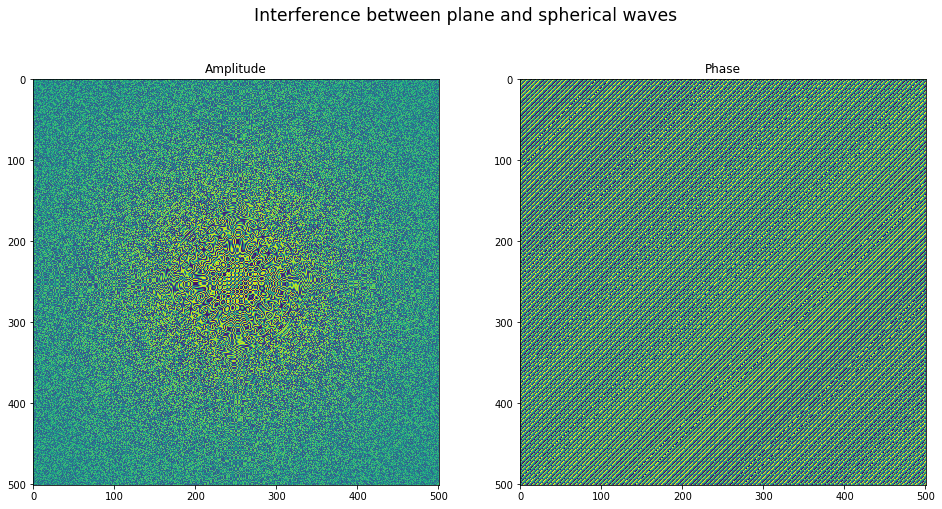

In [3]:
opt.proc2d.ExportImage( abs(f+g) , '.\\images\\PlaneSpherical.png')
fig, ax = plt.subplots( 1, 2 , figsize=(16,8))
fig.suptitle('Interference between plane and spherical waves', fontsize='xx-large')
ax[0].imshow( abs(f+g) )
ax[0].set_title('Amplitude')
ax[1].imshow( np.angle(f+g) )
ax[1].set_title('Phase')
plt.show()

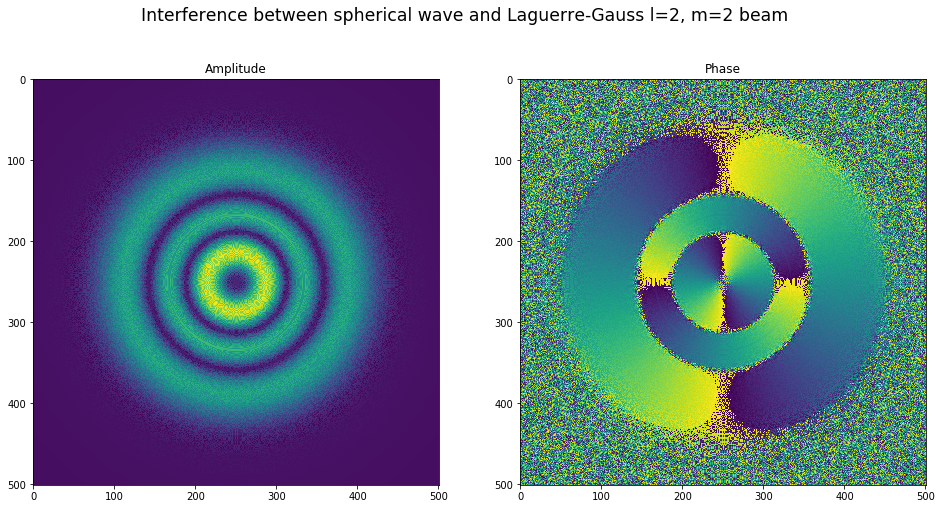

In [4]:
opt.proc2d.ExportImage( abs(g+h) , '.\\images\\SphericalLaguerre.png')
fig, ax = plt.subplots( 1, 2 , figsize=(16,8))
fig.suptitle('Interference between spherical wave and Laguerre-Gauss l=2, m=2 beam', fontsize='xx-large')
ax[0].imshow( abs(g+h) )
ax[0].set_title('Amplitude')
ax[1].imshow( np.angle(g+h) )
ax[1].set_title('Phase')
plt.show()

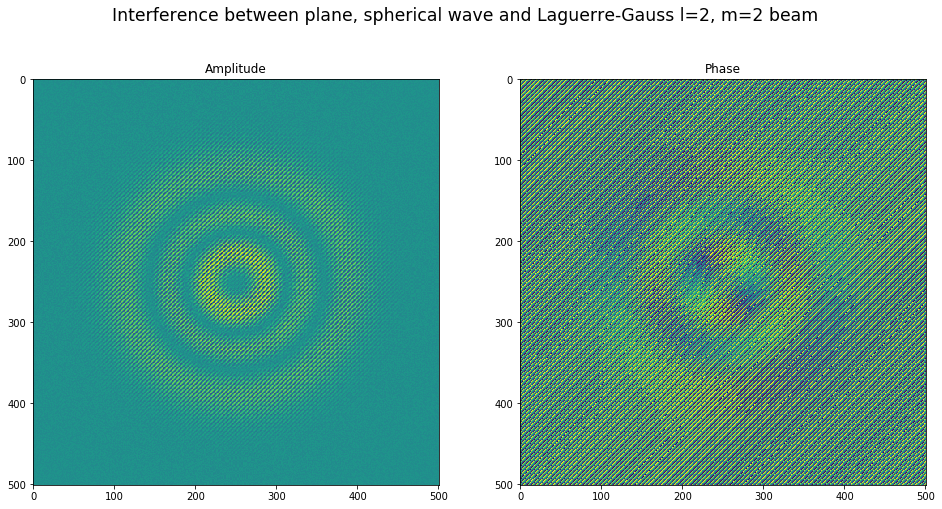

In [5]:
opt.proc2d.ExportImage( abs(h+g+f) , '.\\images\\PlaneSphericalLaguerre.png')
fig, ax = plt.subplots( 1, 2 , figsize=(16,8))
fig.suptitle('Interference between plane, spherical wave and Laguerre-Gauss l=2, m=2 beam', fontsize='xx-large')
ax[0].imshow( abs(h+g+f) )
ax[0].set_title('Amplitude')
ax[1].imshow( np.angle(h+g+f) )
ax[1].set_title('Phase')
plt.show()

## Image quantization and metrics

In [6]:
A0 = opt.proc2d.ImportImage('.\\images\\rhyno.png')
A1 = opt.proc2d.ErrDiffBin( A0 )
A2 = opt.proc2d.QZP( A0 )
A3 = opt.proc2d.QZP( A0 , Z  = 4 )
A = [A0,A1,A2,A3]

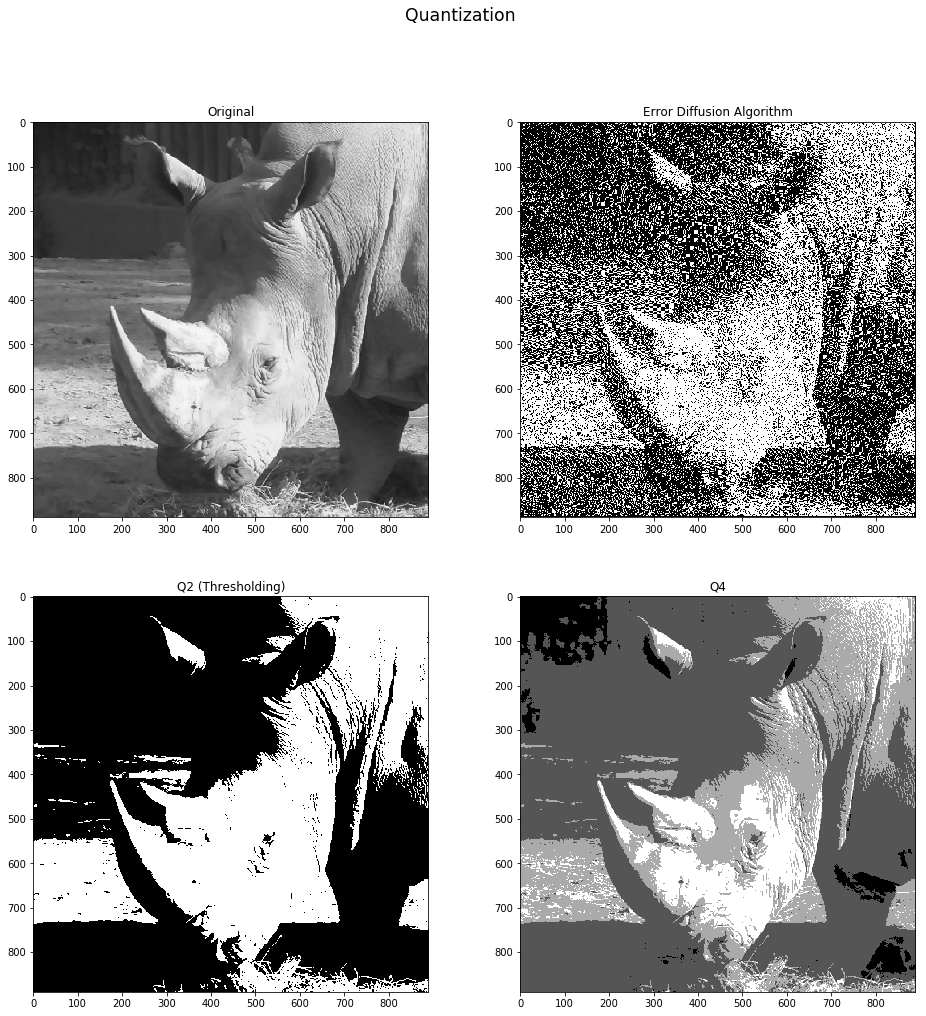

In [7]:
opt.proc2d.ExportImage( A1 , '.\\images\\ErrorDiffusion.png')
fig, ax = plt.subplots( 2, 2 , figsize=(16,16))
fig.suptitle('Quantization', fontsize='xx-large')
ax[0,0].imshow( A0 , cmap='gray' )
ax[0,0].set_title('Original')
ax[0,1].imshow( A1 , cmap='gray' )
ax[0,1].set_title('Error Diffusion Algorithm')
ax[1,0].imshow( A2 , cmap='gray' )
ax[1,0].set_title('Q2 (Thresholding)')
ax[1,1].imshow( A3 , cmap='gray' )
ax[1,1].set_title('Q4')
plt.show()

In [8]:
CC = np.zeros(4)
PSNR = np.zeros(4)

for i in range(4):
    CC[i] = opt.proc2d.CC( A[0] , A[i] ) ; PSNR[i] = opt.proc2d.PSNR( A[0] , A[i] )
    print("%d\tCC:%.3f\tPSNR:%.3f" % (i, CC[i] , PSNR[i]))

0	CC:1.000	PSNR:inf
1	CC:0.899	PSNR:7.351
2	CC:0.914	PSNR:10.802
3	CC:0.929	PSNR:19.979


## Field diffraction

In [9]:
f = np.zeros((1001,1001),dtype='complex')
obj = opt.proc2d.Resize(A0, (501,501))
f1 = opt.proc2d.Embed( f , obj , 0 , 0 )
f2 = f1*opt.fourier.Pinhole( 20 , f1 , pp )*opt.fourier.ThinLens( -40000 , WL , f1 , pp)

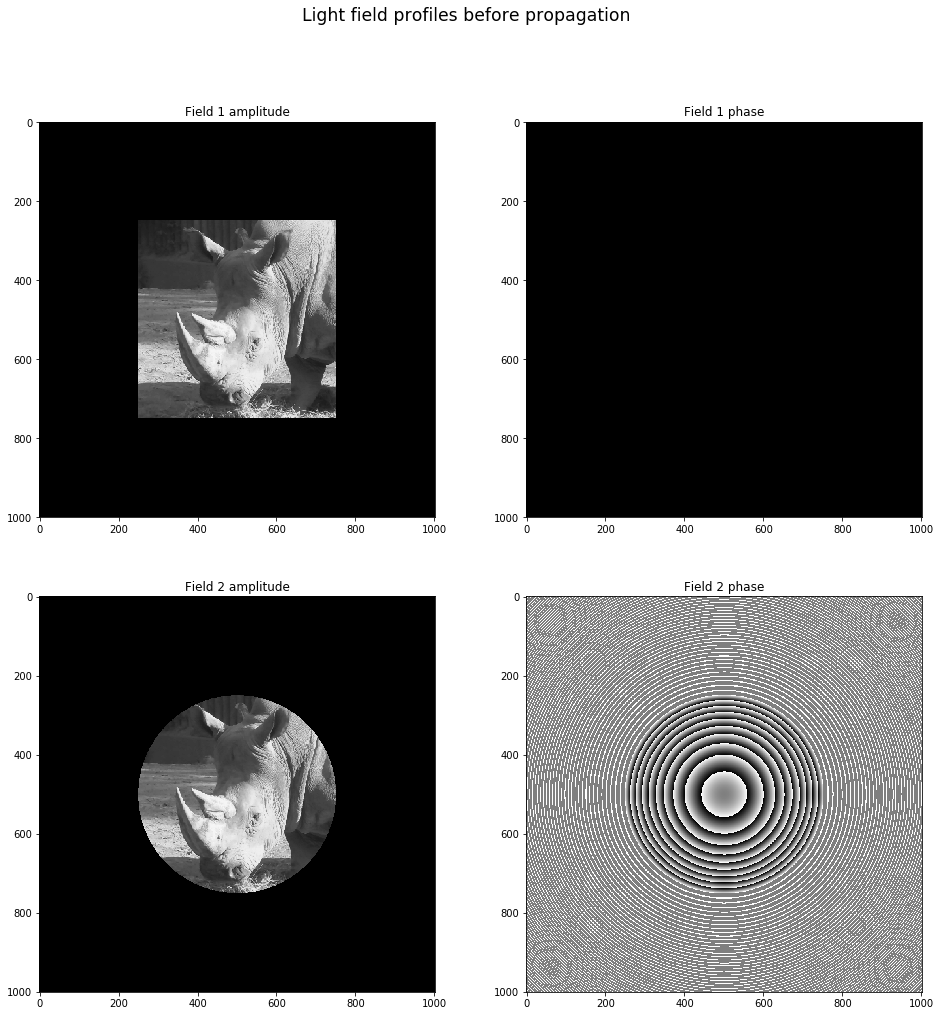

In [10]:
fig, ax = plt.subplots( 2, 2 , figsize=(16,16))
fig.suptitle('Light field profiles before propagation', fontsize='xx-large')
ax[0,0].imshow( abs(f1) , cmap='gray' )
ax[0,0].set_title('Field 1 amplitude')
ax[0,1].imshow( np.angle(f1) , cmap='gray' )
ax[0,1].set_title('Field 1 phase')
ax[1,0].imshow( abs(f2) , cmap='gray' )
ax[1,0].set_title('Field 2 amplitude')
ax[1,1].imshow( np.angle(f2) , cmap='gray' )
ax[1,1].set_title('Field 2 phase')
plt.show()

In [11]:
f1 = opt.fourier.FreeSpace( f1 , 200 , WL , pp )
f2 = opt.fourier.FreeSpace( f2 , 200 , WL , pp )

Propagating using the Optical Transfer Function...
Propagating using the Optical Transfer Function...


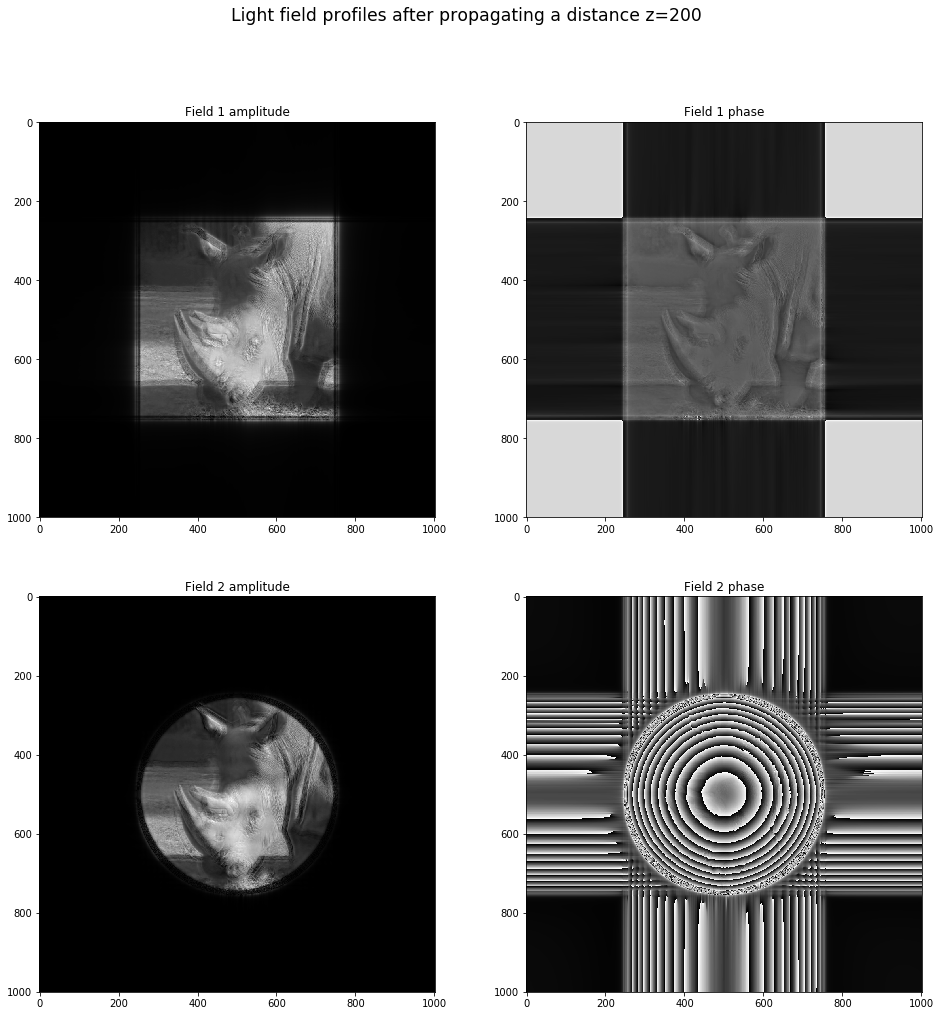

In [12]:
fig, ax = plt.subplots( 2, 2 , figsize=(16,16))
fig.suptitle('Light field profiles after propagating a distance z=200', fontsize='xx-large')
ax[0,0].imshow( abs(f1) , cmap='gray' )
ax[0,0].set_title('Field 1 amplitude')
ax[0,1].imshow( np.angle(f1) , cmap='gray' )
ax[0,1].set_title('Field 1 phase')
ax[1,0].imshow( abs(f2) , cmap='gray' )
ax[1,0].set_title('Field 2 amplitude')
ax[1,1].imshow( np.angle(f2) , cmap='gray' )
ax[1,1].set_title('Field 2 phase')
plt.show()

In [13]:
f1 = opt.fourier.FreeSpace( f1 , 200 , WL , pp )
f2 = opt.fourier.FreeSpace( f2 , 200 , WL , pp )

Propagating using the Optical Transfer Function...
Propagating using the Optical Transfer Function...


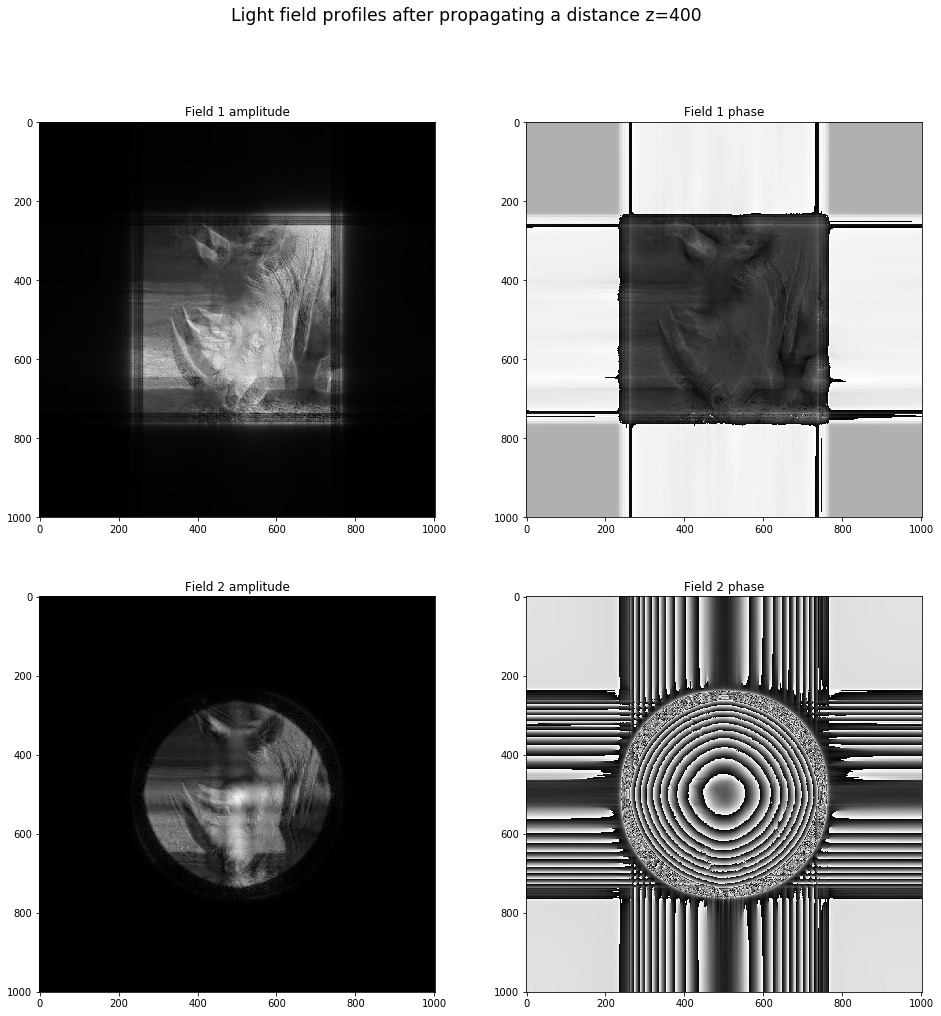

In [14]:
fig, ax = plt.subplots( 2, 2 , figsize=(16,16))
fig.suptitle('Light field profiles after propagating a distance z=400', fontsize='xx-large')
ax[0,0].imshow( abs(f1) , cmap='gray' )
ax[0,0].set_title('Field 1 amplitude')
ax[0,1].imshow( np.angle(f1) , cmap='gray' )
ax[0,1].set_title('Field 1 phase')
ax[1,0].imshow( abs(f2) , cmap='gray' )
ax[1,0].set_title('Field 2 amplitude')
ax[1,1].imshow( np.angle(f2) , cmap='gray' )
ax[1,1].set_title('Field 2 phase')
plt.show()